## Cotton Disease Prediction Using Resnet50

Download data from the link below:
https://www.kaggle.com/janmejaybhoi/cotton-disease-dataset

In [1]:
# Import important liabraries
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
163/163 [==============================] - 275s 2s/step - loss: 0.5848 - accuracy: 0.7791 - val_loss: 0.4482 - val_accuracy: 0.8109
Epoch 2/20
163/163 [==============================] - 272s 2s/step - loss: 0.2989 - accuracy: 0.8763 - val_loss: 0.4410 - val_accuracy: 0.7997
Epoch 3/20
163/163 [==============================] - 269s 2s/step - loss: 0.2802 - accuracy: 0.8808 - val_loss: 0.4628 - val_accuracy: 0.7933
Epoch 4/20
163/163 [==============================] - 267s 2s/step - loss: 0.3027 - accuracy: 0.8811 - val_loss: 0.3778 - val_accuracy: 0.8365
Epoch 5/20
134/163 [=======================>......] - ETA: 42s - loss: 0.3723 - accuracy: 0.8647

In [15]:
import matplotlib.pyplot as plt

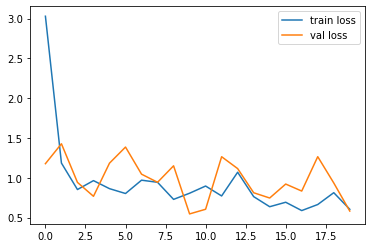

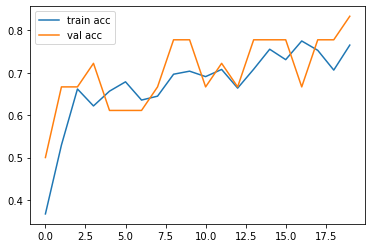

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[4.6028069e-01, 4.2785570e-01, 1.8194499e-03, 1.1004425e-01],
       [1.2456058e-03, 2.1999054e-01, 2.9343413e-03, 7.7582955e-01],
       [4.0850281e-03, 2.0442104e-01, 3.6146673e-03, 7.8787929e-01],
       [1.0539906e-03, 9.7053313e-01, 2.6427968e-03, 2.5770148e-02],
       [5.9945062e-03, 1.3547151e-05, 9.9395496e-01, 3.6919846e-05],
       [2.5602970e-03, 8.5633159e-01, 2.4807015e-03, 1.3862732e-01],
       [3.5762470e-03, 3.8139450e-03, 9.7679931e-01, 1.5810475e-02],
       [1.9709223e-03, 9.8689938e-01, 1.1698652e-05, 1.1118018e-02],
       [1.6579570e-03, 9.1681623e-01, 1.1498753e-05, 8.1514366e-02],
       [2.9348559e-05, 5.2118244e-06, 9.9913234e-01, 8.3309750e-04],
       [8.0593444e-02, 3.4924913e-02, 7.9136413e-01, 9.3117468e-02],
       [6.2303816e-04, 6.3761003e-02, 6.8022392e-04, 9.3493575e-01],
       [3.7324093e-03, 2.4468182e-02, 5.1713032e-03, 9.6662807e-01],
       [9.9804401e-01, 1.3442949e-06, 2.7363867e-04, 1.6809835e-03],
       [4.2584237e-02, 6.8954170e-

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([0, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 0, 1, 1, 2, 3], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')